In [ ]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [15]:
## Exemplo usando a P&G com fonte datareader do yahoo
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

In [13]:
PG.head() #Dias iniciais

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.014160
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.949919
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.837494
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.853552
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.821426


In [12]:
PG.tail() #dias finais

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-20,158.460007,156.570007,156.600006,157.860001,9202600.0,157.860001
2021-12-21,158.149994,156.789993,157.649994,157.759995,6946000.0,157.759995
2021-12-22,159.580002,157.270004,157.770004,159.320007,6626300.0,159.320007
2021-12-23,160.919998,159.440002,159.500000,160.100006,5640900.0,160.100006
2021-12-27,161.990005,160.610001,160.669998,161.940002,3791658.0,161.940002


In [17]:
## pandas.DataFrame.shift (# de voltas), onde mudamos o índice por #, no casso o .shift(1) é 
##pra calcular em relação ao dia anterior
PG['simple return'] = (PG['Adj Close'] / PG ['Adj Close'].shift(1)) - 1
print (PG['simple return'])

Date
1995-01-03         NaN
1995-01-04   -0.008015
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2021-12-20    0.002540
2021-12-21   -0.000634
2021-12-22    0.009889
2021-12-23    0.004896
2021-12-27    0.011493
Name: simple return, Length: 6795, dtype: float64


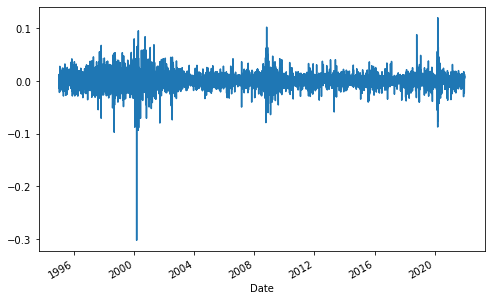

In [18]:
## criando gráfico inicial
PG['simple return'].plot(figsize=(8,5))
plt.show();

In [21]:
## pandas.DataFrame.mean() - calcula a taxa de retorno da média diária
avg_returns_d = PG['simple return'].mean();
avg_returns_d

0.000542726696677201

In [24]:
## multiplicando por 250 dias úteis para ter uma noção do retorno da média anual
avg_returns_a = PG['simple return'].mean() * 250;
avg_returns_a

0.13568167416930024

In [26]:
 ## transformando em string, arrendondando e colocando %
print(str(round(avg_returns_a, 5) * 100) + '%') 

13.568%
